### Name: Riya Shyam Huddar
### Roll no: MDS202431
### ADA Assignment 2

In [240]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [201]:
# Load CSV
df = pd.read_csv("D:/CMI/ADA/Assignment_2/Network_flows_data.csv")

### Questions Addressed

The primary goal of this assignment is to build machine learning models for **traffic classification** using the `web_service` label as the target variable.  
Each record in the dataset represents a network flow, and the task is to predict which service (e.g., YouTube, Dropbox, etc.) generated that flow.

The key questions addressed in this analysis are:

1. **Can network traffic be accurately classified into different web services using machine learning algorithms?**  
2. **Which algorithms perform best for this task?**  
   - We will compare models such as Logistic Regression, K-Nearest Neighbors (KNN), Random Forest, and XGBoost.  
3. **How well do the models generalize to unseen traffic?**  
   - We will evaluate performance on a held-out test set.  
4. **What are the limitations and challenges in this dataset?**  
   - Class imbalance, high dimensionality, or overlapping traffic patterns.


### Dataset Description

The dataset consists of **2,704,839 records** and **50 features**, where each row represents a network flow.  
It provides statistical information about packets, bytes, and timing of traffic between a source and destination.

**Feature groups:**
- **Identifiers**: `flow_key`, `src_ip`, `dst_ip`, `src_port`, `dst_port` 
- **Flow Statistics**: `pktTotalCount`, `octetTotalCount`, `min_ps`, `max_ps`, `avg_ps`, `std_dev_ps`  
- **Timing Features**: `flowStart`, `flowEnd`, `flowDuration`, `min_piat`, `max_piat`, `avg_piat`, `std_dev_piat`  
- **Directional Statistics**: forward (`f_`) and backward (`b_`) versions of the same flow metrics  
- **Labels**:  
  - `category` - broad traffic class (e.g., Web, Network, Media)  
  - `application_protocol` -  protocol-level info (e.g., HTTP, FTP, TLS)  
  - `web_service` - **specific service-level label (target variable for this assignment)**

No significant missing values were observed.  
The target variable **`web_service`** makes this a **multi-class classification problem**,  
where the goal is to identify the correct service generating the traffic flow.


In [160]:
df.head()

,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol,web_service
0,3acee4f4ea001cd5e6d9584d4036b53d,3232266497,192.168.121.1,67,172.16.255.185,67,17,22,7620,328,...,1.555955e+09,1.554399e+12,0.010354,198.657965,51.689181,84.916348,2,Network,Unknown,DHCP
1,974ec5991b439c9a7176b88be0c90df0,3232266497,192.168.121.1,67,172.16.255.186,67,17,17,5670,328,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Network,Unknown,DHCP
2,3acee4f4ea001cd5e6d9584d4036b53d,3232266497,192.168.121.1,67,172.16.255.185,67,17,43,15124,328,...,1.555965e+09,1.554409e+12,0.022332,340.268454,89.927588,124.270745,2,Network,Unknown,DHCP
3,974ec5991b439c9a7176b88be0c90df0,3232266497,192.168.121.1,67,172.16.255.186,67,17,30,10086,328,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Network,Unknown,DHCP
4,cfa7c2740072befaa89c202499729e08,3232266497,192.168.121.1,0,10.130.1.166,0,1,1,56,56,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Network,Unknown,ICMP


---

### Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704839 entries, 0 to 2704838
Data columns (total 50 columns):
 #   Column                Dtype  
---  ------                -----  
 0   flow_key              object 
 1   src_ip_numeric        int64  
 2   src_ip                object 
 3   src_port              int64  
 4   dst_ip                object 
 5   dst_port              int64  
 6   proto                 int64  
 7   pktTotalCount         int64  
 8   octetTotalCount       int64  
 9   min_ps                int64  
 10  max_ps                int64  
 11  avg_ps                float64
 12  std_dev_ps            float64
 13  flowStart             float64
 14  flowEnd               float64
 15  flowDuration          float64
 16  min_piat              float64
 17  max_piat              float64
 18  avg_piat              float64
 19  std_dev_piat          float64
 20  f_pktTotalCount       int64  
 21  f_octetTotalCount     int64  
 22  f_min_ps              int64  
 23  f_max_p

In [7]:
df.describe()

,src_ip_numeric,src_port,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,...,b_avg_ps,b_std_dev_ps,b_flowStart,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason
count,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,...,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06,2.704839e+06
mean,3.232268e+09,5.114658e+04,2.733782e+03,1.082042e+01,8.916930e+01,1.070166e+05,5.822987e+01,1.249313e+03,2.285245e+02,2.747979e+02,...,2.880519e+02,2.810434e+02,1.338105e+09,1.338105e+09,7.078825e+11,1.901194e+00,1.579579e+01,4.132842e+00,4.050805e+00,2.645965e+00
std,7.156085e+02,1.317720e+04,9.206813e+03,5.478148e+00,3.804669e+03,5.454587e+06,6.023631e+01,2.939242e+03,3.416309e+02,5.356919e+02,...,5.933458e+02,6.290754e+02,5.414336e+08,5.414336e+08,7.746749e+11,3.518928e+01,6.121748e+01,3.715773e+01,1.630467e+01,8.886754e-01
min,3.232266e+09,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
25%,3.232267e+09,4.977700e+04,5.300000e+01,6.000000e+00,2.000000e+00,1.600000e+02,4.000000e+01,8.200000e+01,6.900000e+01,8.000000e+00,...,4.600000e+01,0.000000e+00,1.556031e+09,1.556031e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
50%,3.232268e+09,5.326100e+04,4.430000e+02,6.000000e+00,3.000000e+00,3.120000e+02,5.200000e+01,1.640000e+02,1.080882e+02,4.300000e+01,...,1.140000e+02,0.000000e+00,1.556138e+09,1.556139e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
75%,3.232268e+09,5.901100e+04,4.430000e+02,1.700000e+01,1.800000e+01,5.336000e+03,6.500000e+01,1.458000e+03,2.492222e+02,4.278286e+02,...,2.800000e+02,3.922821e+02,1.556659e+09,1.556659e+09,1.554586e+12,6.198883e-06,3.407998e+00,3.276894e-01,5.035027e-01,3.000000e+00
max,3.232269e+09,6.553500e+04,6.553500e+04,1.700000e+01,2.292425e+06,2.981112e+09,1.162400e+04,2.632000e+04,1.162400e+04,9.370133e+03,...,1.583600e+04,1.168000e+04,1.559771e+09,1.559771e+09,1.558212e+12,1.780821e+03,1.780821e+03,1.780821e+03,8.399001e+02,5.000000e+00


###  Target Variable 
- The target variable `web_service` has **141 unique classes**.  
- The class distribution is **highly imbalanced**: a few services dominate, while many have very few samples.  


In [104]:
# Distribution of web_service
print(df['web_service'].value_counts())
print(df['web_service'].nunique())  # unique classes


web_service
Google       569828
DNS          419915
TLS          259590
Unknown      249071
Microsoft    172392
              ...  
Zoom              1
BGP               1
MDNS              1
SOMEIP            1
GTP               1
Name: count, Length: 141, dtype: int64
141


### Missing Values

We checked the dataset for missing values using `df.isnull().sum()`.  
No missing values were detected across any of the 50 features, so no imputation or deletion was necessary.


In [13]:
print(df.shape)
print(df.isnull().sum())

(2704839, 50)
flow_key                0
src_ip_numeric          0
src_ip                  0
src_port                0
dst_ip                  0
dst_port                0
proto                   0
pktTotalCount           0
octetTotalCount         0
min_ps                  0
max_ps                  0
avg_ps                  0
std_dev_ps              0
flowStart               0
flowEnd                 0
flowDuration            0
min_piat                0
max_piat                0
avg_piat                0
std_dev_piat            0
f_pktTotalCount         0
f_octetTotalCount       0
f_min_ps                0
f_max_ps                0
f_avg_ps                0
f_std_dev_ps            0
f_flowStart             0
f_flowEnd               0
f_flowDuration          0
f_min_piat              0
f_max_piat              0
f_avg_piat              0
f_std_dev_piat          0
b_pktTotalCount         0
b_octetTotalCount       0
b_min_ps                0
b_max_ps                0
b_avg_ps                

### Handling Duplicate Flows

- Total rows: 2,704,839  
- Unique flow keys: 2,344,534  
- Duplicate flows (same `flow_key` repeated): 360,305 (≈13%)  
- Exact duplicate rows (all columns identical): 20  

**Approach Taken:**

- **Exact duplicates** were removed using `drop_duplicates()`, as they are trivial and do not provide additional information.
- **Flows with the same `flow_key` but different statistics** were aggregated to create a single representative record per flow. This preserves meaningful statistical patterns while reducing dataset size.
- Aggregation ensures that features like packet counts, flow duration, and timing metrics reflect the overall characteristics of each flow without over-representing repeated observations.
> Approximately 13% of flows shared the same `flow_key` but differed in their statistics. By aggregating these, we maintain representative flow information while simplifying the dataset for modeling.

In [203]:
# Total rows in the dataset
total_rows = len(df)
print("Total rows:", total_rows)

# Total unique flow keys
unique_flows = df['flow_key'].nunique()   
print("Unique flow keys:", unique_flows)

# Check Duplicates
duplicate_count = total_rows - unique_flows
print("Number of duplicate flows:", duplicate_count)


Total rows: 2704839
Unique flow keys: 2344534
Number of duplicate flows: 360305


In [207]:
# Identify exact duplicate rows across all columns
exact_duplicates = df.duplicated(keep=False)  
num_exact_duplicates = exact_duplicates.sum()

print("Number of exact duplicate rows:", num_exact_duplicates)

# Print exact duplicates
df[exact_duplicates].sort_values('flow_key').head(20)


Number of exact duplicate rows: 20


,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol,web_service
2144745,1b44a27fcc149f573677e10544299f89,3232267622,192.168.125.102,50477,192.16.48.200,80,6,2,80,40,...,0.0,0.0,0.0,0.0,0.0,0.0,4,Web,Unknown,HTTP
2144744,1b44a27fcc149f573677e10544299f89,3232267622,192.168.125.102,50477,192.16.48.200,80,6,2,80,40,...,0.0,0.0,0.0,0.0,0.0,0.0,4,Web,Unknown,HTTP
1842162,4179f6218a1a94fc3ea5c1566b3decdb,3232268320,192.168.128.32,62519,185.216.87.121,8080,6,2,80,40,...,0.0,0.0,0.0,0.0,0.0,0.0,4,Web,Unknown,HTTP_Proxy
1842163,4179f6218a1a94fc3ea5c1566b3decdb,3232268320,192.168.128.32,62519,185.216.87.121,8080,6,2,80,40,...,0.0,0.0,0.0,0.0,0.0,0.0,4,Web,Unknown,HTTP_Proxy
2474034,948047ca039cd15cb2856dcef2f49f4d,3232268430,192.168.128.142,39253,190.90.252.32,443,6,2,80,40,...,0.0,0.0,0.0,0.0,0.0,0.0,4,Web,Unknown,TLS
2474033,948047ca039cd15cb2856dcef2f49f4d,3232268430,192.168.128.142,39253,190.90.252.32,443,6,2,80,40,...,0.0,0.0,0.0,0.0,0.0,0.0,4,Web,Unknown,TLS
1448852,abdb77e92cc2137efe7242ffea959b7b,3232268075,192.168.127.43,56602,173.194.136.215,443,6,2,80,40,...,0.0,0.0,0.0,0.0,0.0,0.0,4,Web,TLS,Google
1448853,abdb77e92cc2137efe7242ffea959b7b,3232268075,192.168.127.43,56602,173.194.136.215,443,6,2,80,40,...,0.0,0.0,0.0,0.0,0.0,0.0,4,Web,TLS,Google
2529652,b85c63c4d926057959165384b6418d4a,3232268481,192.168.128.193,42536,190.90.252.32,443,6,2,80,40,...,0.0,0.0,0.0,0.0,0.0,0.0,4,Web,Unknown,TLS
2529653,b85c63c4d926057959165384b6418d4a,3232268481,192.168.128.193,42536,190.90.252.32,443,6,2,80,40,...,0.0,0.0,0.0,0.0,0.0,0.0,4,Web,Unknown,TLS


In [209]:
df = df.drop_duplicates()

In [211]:
# Define aggregation rules for duplicates
agg_rules = {
    # Keep identifiers (first occurrence)
    "src_ip_numeric": "first",
    "src_ip": "first",
    "src_port": "first",
    "dst_ip": "first",
    "dst_port": "first",
    "proto": "first",
    
    # Flow-level numeric aggregations
    "pktTotalCount": "sum",
    "octetTotalCount": "sum",
    "min_ps": "min",
    "max_ps": "max",
    "avg_ps": "mean",
    "std_dev_ps": "mean",
    "flowStart": "min",
    "flowEnd": "max",
    "flowDuration": "max",
    "min_piat": "min",       
    "max_piat": "max",
    "avg_piat": "mean",
    "std_dev_piat": "mean",
    
    # Forward stats
    "f_pktTotalCount": "sum",
    "f_octetTotalCount": "sum",
    "f_min_ps": "min",
    "f_max_ps": "max",
    "f_avg_ps": "mean",
    "f_std_dev_ps": "mean",
    "f_flowStart": "min",
    "f_flowEnd": "max",
    "f_flowDuration": "max",
    "f_min_piat": "min",
    "f_max_piat": "max",
    "f_avg_piat": "mean",
    "f_std_dev_piat": "mean",
    
    # Backward stats
    "b_pktTotalCount": "sum",
    "b_octetTotalCount": "sum",
    "b_min_ps": "min",
    "b_max_ps": "max",
    "b_avg_ps": "mean",
    "b_std_dev_ps": "mean",
    "b_flowStart": "min",
    "b_flowEnd": "max",
    "b_flowDuration": "max",
    "b_min_piat": "min",
    "b_max_piat": "max",
    "b_avg_piat": "mean",
    "b_std_dev_piat": "mean",
    
    # Keep categorical fields (first occurrence)
    "flowEndReason": "first",
    "category": "first",
    "application_protocol": "first",
    "web_service": "first"  # target
}

# Aggregate by flow_key
df_agg = df.groupby("flow_key", as_index=False).agg(agg_rules)

print(f"Original rows: {len(df)}")
print(f"Rows after aggregation: {len(df_agg)}")


Original rows: 2704829
Rows after aggregation: 2344534


### Cumulative Distribution of Flows Across Web Services

The dataset contains **141 unique web services**. The cumulative distribution plot shows that the **top 15 services account for 90% of all flows**, indicating severe class imbalance.  

Most of the remaining 126 services collectively contribute only 10% of the traffic. This imbalance implies that machine learning models will predominantly learn the patterns of the major services, while rare services may be underrepresented, making their accurate classification more challenging.  


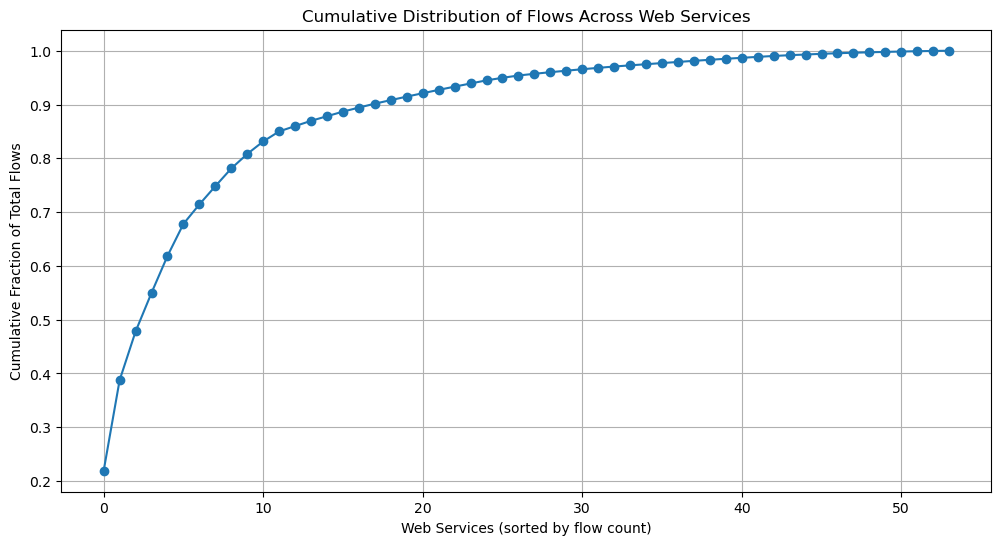

In [172]:
# Cumulative distribution of flows per service
service_counts = df_agg['web_service'].value_counts().sort_values(ascending=False)
cumulative = service_counts.cumsum() / service_counts.sum()

plt.figure(figsize=(12,6))
plt.plot(cumulative.values, marker='o')
plt.title("Cumulative Distribution of Flows Across Web Services")
plt.xlabel("Web Services (sorted by flow count)")
plt.ylabel("Cumulative Fraction of Total Flows")
plt.grid(True)
plt.show()


### Class Distribution

The bar chart of the top 20 web services reveals a significant **class imbalance** in the dataset.  
Certain services such as **Google**, **DNS**, **TLS**, **Microsoft**, and generic **HTTP** traffic dominate the dataset with very high flow counts.  
In contrast, many other services have far fewer records.  


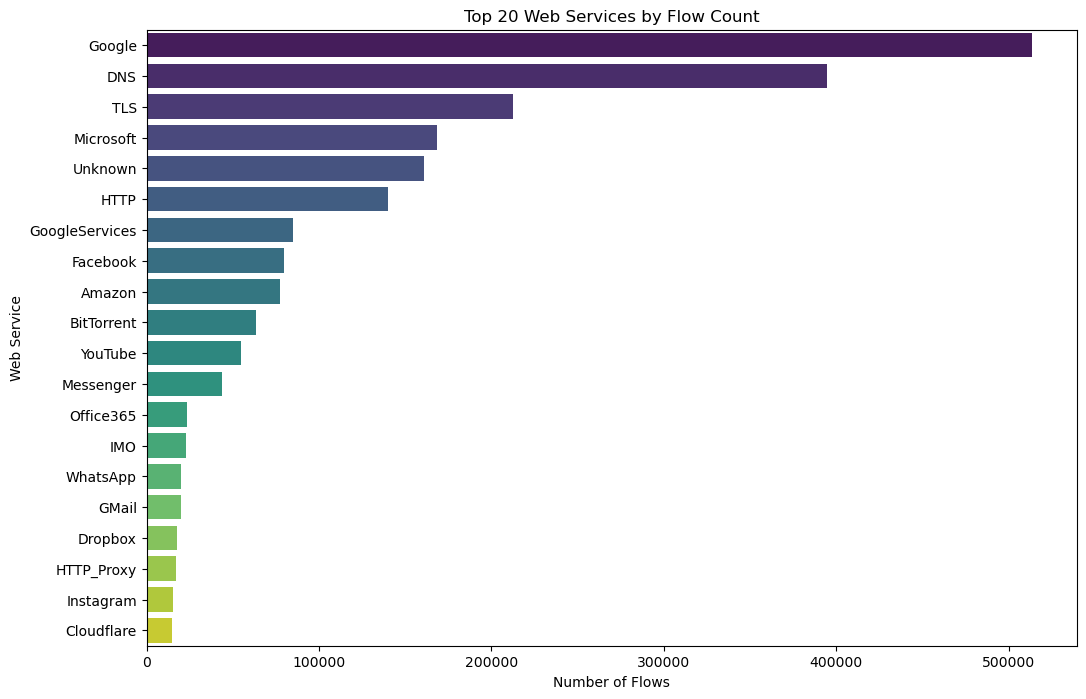

In [128]:
# Get top 20 web services
top20_counts = df_agg['web_service'].value_counts().head(20)
plt.figure(figsize=(12, 8))
sns.barplot(
    x=top20_counts.values,
    y=top20_counts.index,
    hue=top20_counts.index,  
    palette="viridis",
    dodge=False,
    legend=False            
)

plt.title("Top 20 Web Services by Flow Count")
plt.xlabel("Number of Flows")
plt.ylabel("Web Service")
plt.show()


We see similar trends of imbalance in Category and application protocols as well

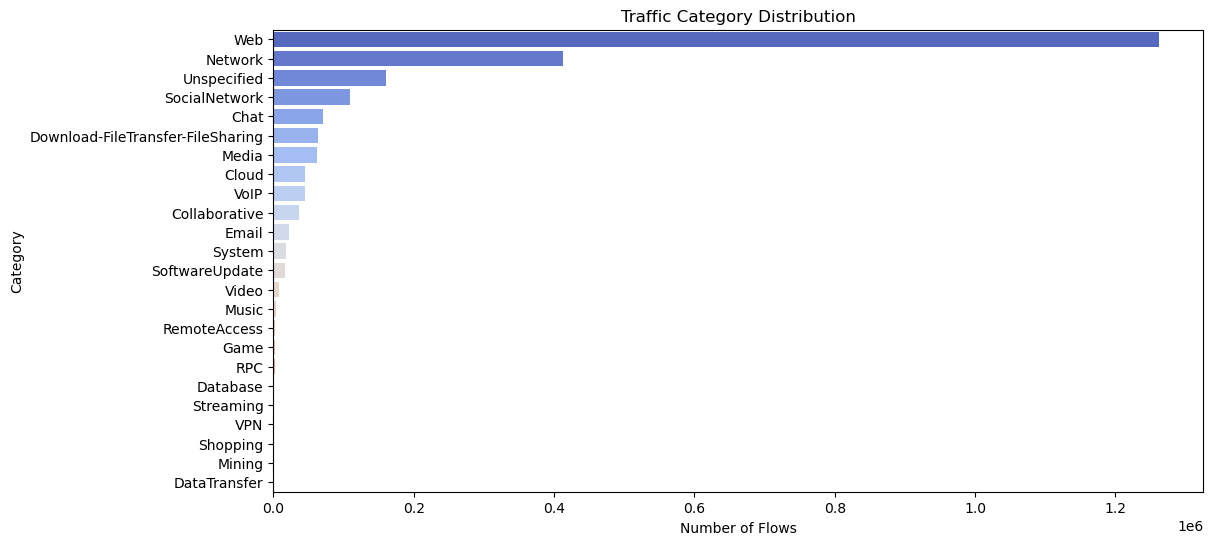

In [130]:
category_counts = df_agg['category'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(
    x=category_counts.values,
    y=category_counts.index,
    hue=category_counts.index,  
    dodge=False,
    palette="coolwarm",
    legend=False
)
plt.xlabel("Number of Flows")
plt.ylabel("Category")
plt.title("Traffic Category Distribution")
plt.show()



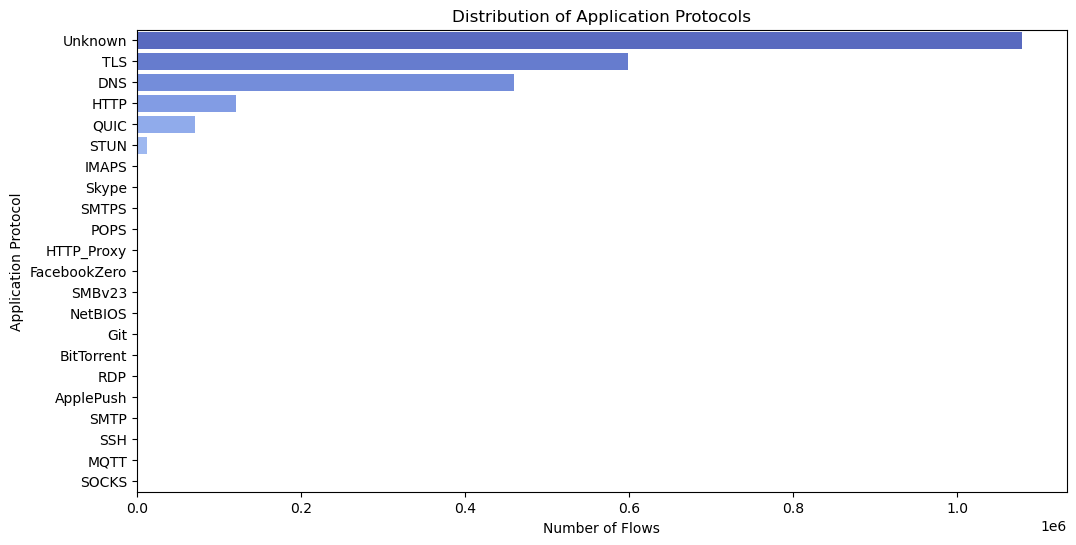

In [132]:
protocol_counts = df_agg['application_protocol'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(
    x=protocol_counts.values,
    y=protocol_counts.index,
    hue=protocol_counts.index, 
    dodge=False,
    palette="coolwarm",
    legend=False
)
plt.xlabel("Number of Flows")
plt.ylabel("Application Protocol")
plt.title("Distribution of Application Protocols")
plt.show()


### Heatmap Observations

The correlation heatmap shows the relationship between numeric features in the dataset. We identified several pairs of features with strong correlation (>|0.7|).

Some representative observations:
- Temporal features like `flowStart` and `flowEnd` are perfectly positively correlated (correlation = 1.00), as expected.
- Packet-level metrics such as `pktTotalCount` and `octetTotalCount` are strongly positively correlated (correlation = 0.92).
- Statistical measures like `avg_ps` and `std_dev_ps` show high positive correlation (correlation = 0.90).
- Forward and backward flow aggregates (e.g., `b_max_ps` and `b_std_dev_ps`) are also highly correlated (correlation = 0.89).
- Certain derived features like `f_avg_piat` and `f_min_piat` exhibit strong correlation (correlation = 0.82).

These patterns suggest redundancy among some features and can guide feature selection or preprocessing before applying machine learning algorithms.


In [134]:
numeric_cols = df_agg.select_dtypes(include=['int64', 'float64','int32']).columns

In [33]:
corr_matrix = df_agg[numeric_cols].corr()

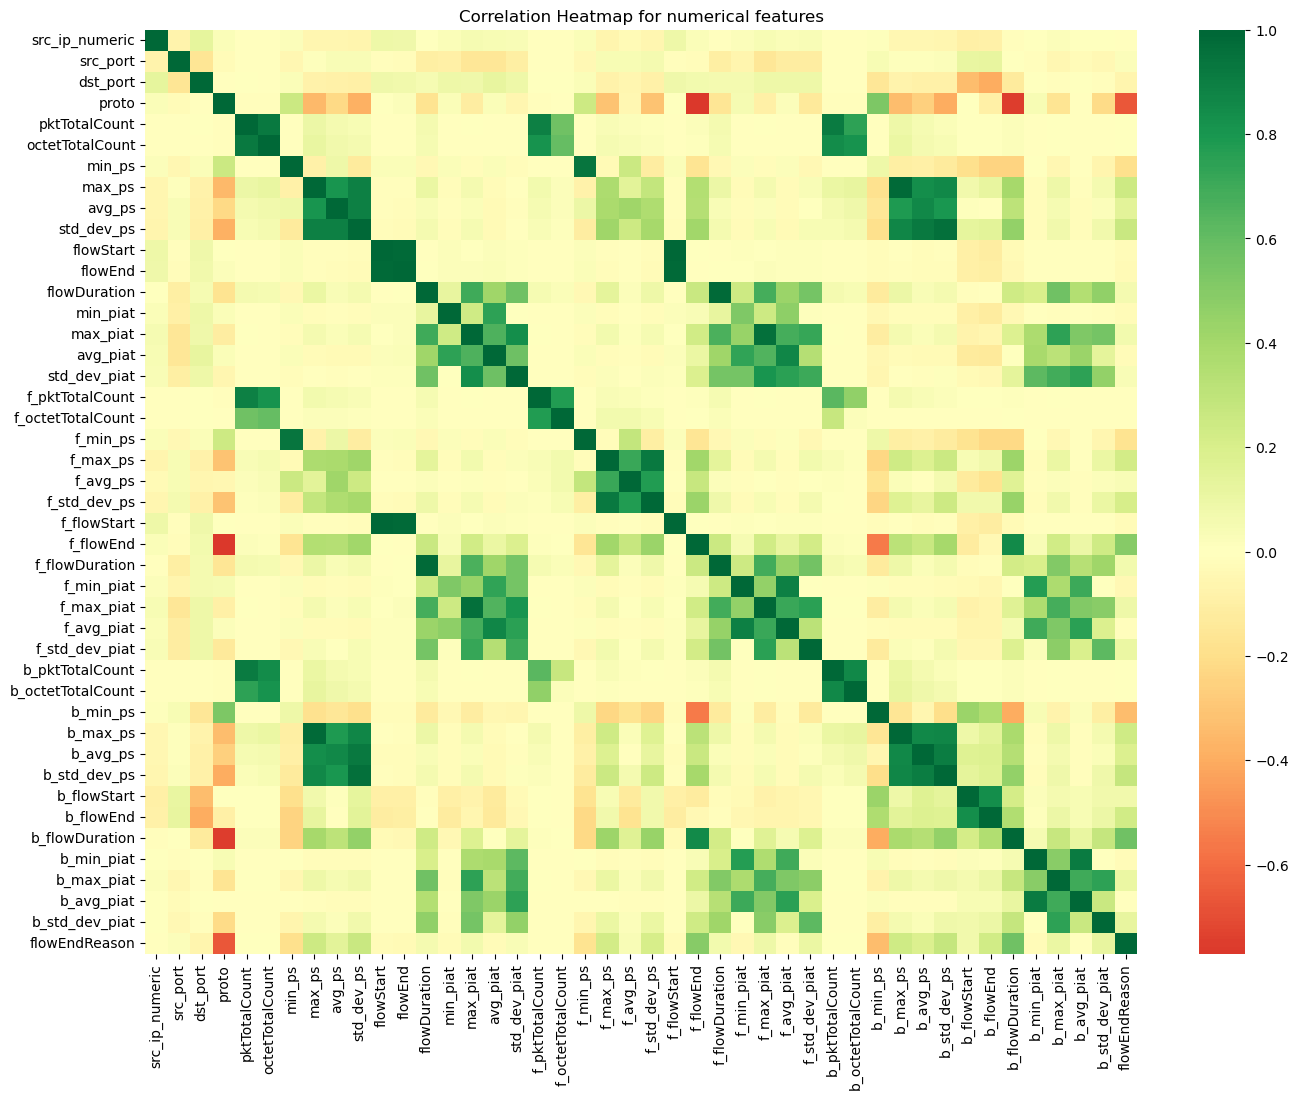

In [35]:
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=False, cmap='RdYlGn', center=0)
plt.title("Correlation Heatmap for numerical features")
plt.show()


### Distribution of pktTotalCount

The `pktTotalCount` variable is highly skewed, most flows have few packets, while a few flows have extremely high counts. Plotting the raw values results in a stretched axis, making it hard to see patterns for the majority of flows.

To handle this, we apply a **log transformation** (`log1p` adds 1 to avoid issues with zero values). This compresses the range of large values while preserving the relative differences between small and medium counts.  


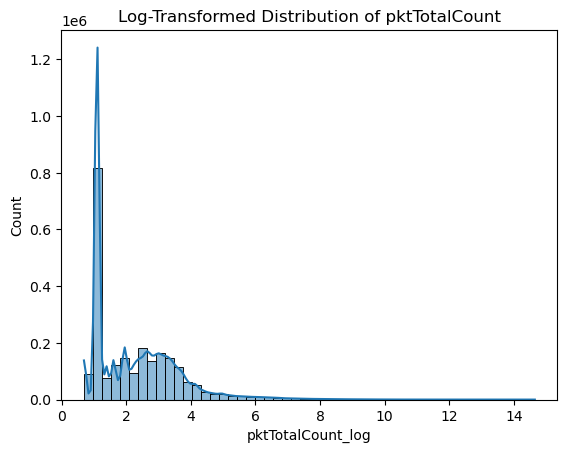

In [223]:
# Add 1 to avoid log(0)
df_agg['pktTotalCount_log'] = np.log1p(df_agg['pktTotalCount'])

sns.histplot(df_agg['pktTotalCount_log'], bins=50, kde=True)
plt.title('Log-Transformed Distribution of pktTotalCount')
plt.show()


### Distribution of flowDuration

`flowDuration` is heavily skewed: most flows are short, but some last a long time. Using a **log transformation** (`log1p`) compresses large values and makes the distribution easier to interpret.

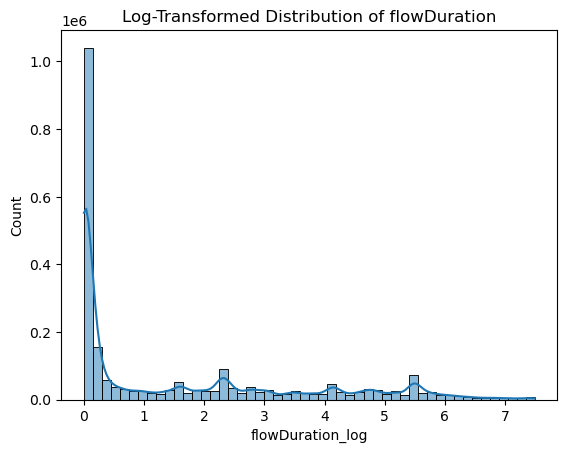

In [225]:
# Log-transform flowDuration
df_agg['flowDuration_log'] = np.log1p(df_agg['flowDuration'])

sns.histplot(df_agg['flowDuration_log'], bins=50, kde=True)
plt.title('Log-Transformed Distribution of flowDuration')
plt.show()


### Skewness and Variance of Key Features

The table above summarizes the **skewness** and **variance** of selected numeric features in the dataset:

- Features like `pktTotalCount` and `octetTotalCount` are **extremely skewed** (skewness > 200), with very high variance. This indicates that most flows have relatively few packets/bytes, while a few flows have extremely large values.  
- `flowDuration` and `avg_ps` also show noticeable skew, though less extreme.  
- `min_piat` (minimum inter-arrival time) is highly skewed, reflecting the presence of majority of flows with very short intervals between packets.  

In [227]:
# Select key numeric features
features = ['pktTotalCount', 'flowDuration', 'octetTotalCount', 'avg_ps', 'min_piat']

# Compute skewness and variance
summary_stats = pd.DataFrame({
    'Feature': features,
    'Skewness': [df_agg[f].skew() for f in features],
    'Variance': [df_agg[f].var() for f in features]
})

summary_stats.round(2)


,Feature,Skewness,Variance
0,pktTotalCount,220.17,1.906832e+07
1,flowDuration,6.17,2.623769e+04
2,octetTotalCount,224.37,3.749233e+13
3,avg_ps,4.54,1.213146e+05
4,min_piat,43.32,3.776100e+02


### Big Flows and Service-Level Traffic

To further understand traffic patterns, we analyzed the **top 20 web services** by flow count and aggregated two key metrics:

1. **Total Packets** (`pktTotalCount`) – total number of packets transmitted for each service.  
2. **Total Flow Duration** (`flowDuration`) – cumulative duration of all flows for each service.

Since the metrics are highly skewed, a **logarithmic transformation** was applied for visualization.  

**Observations:**
- Services like **Google**, **TLS**, and **Microsoft** dominate both in total packets and total flow duration, indicating they carry a large volume of traffic.  
- Some services have extremely high packet counts but shorter flow durations (or vice versa), highlighting differences in traffic patterns.  
- This confirms that a few services generate the majority of traffic, reinforcing the **class imbalance** observed earlier.  

Understanding these `big flows` is important because they can influence the performance and bias of machine learning models, particularly for minority services with few flows.


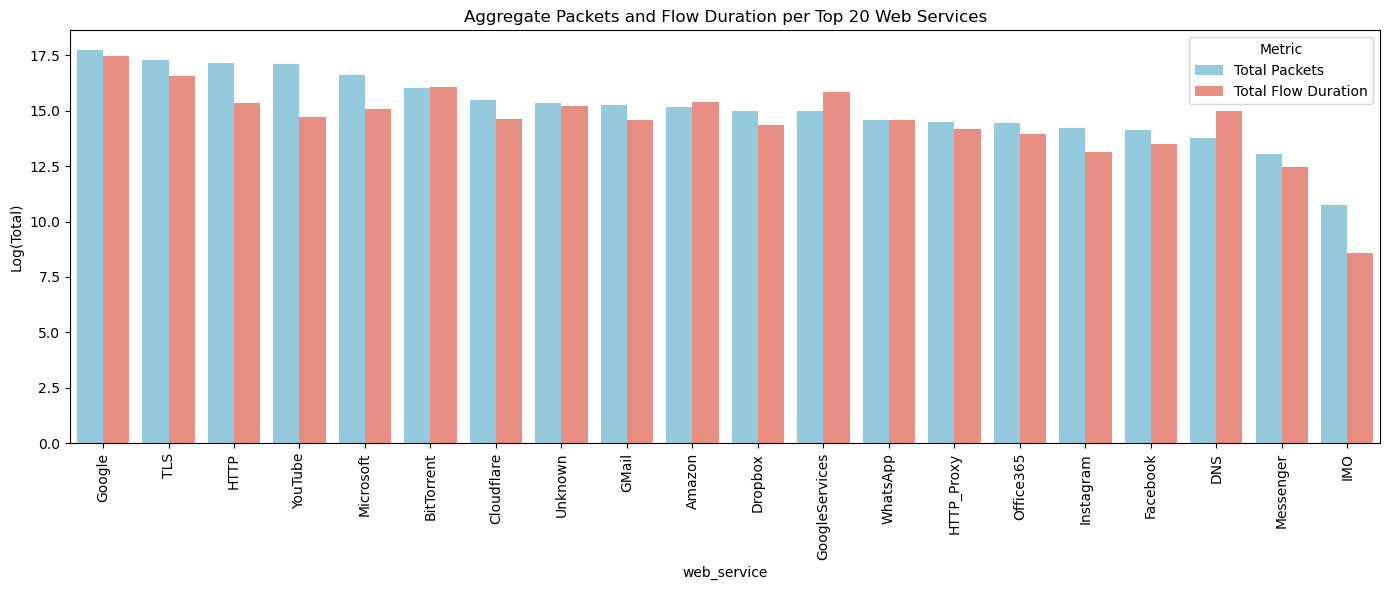

In [229]:
# Get top 20 services by count
top_services = df_agg['web_service'].value_counts().nlargest(20).index
df_top = df_agg[df_agg['web_service'].isin(top_services)]

# Aggregate metrics per service
agg_df = df_top.groupby('web_service').agg({
    'pktTotalCount': 'sum',
    'flowDuration': 'sum'
}).reset_index()

# Log-transform to handle skew
agg_df['pktTotalCount_log'] = np.log1p(agg_df['pktTotalCount'])
agg_df['flowDuration_log'] = np.log1p(agg_df['flowDuration'])

# Sort by pktTotalCount 
agg_df_sorted = agg_df.sort_values('pktTotalCount', ascending=False)


agg_melted = agg_df_sorted.melt(
    id_vars='web_service', 
    value_vars=['pktTotalCount_log', 'flowDuration_log'], 
    var_name='Metric', 
    value_name='Log_Total'
)

# Map metric names 
agg_melted['Metric'] = agg_melted['Metric'].map({
    'pktTotalCount_log': 'Total Packets',
    'flowDuration_log': 'Total Flow Duration'
})

# Plot  
plt.figure(figsize=(14,6))
sns.barplot(
    x='web_service', 
    y='Log_Total', 
    hue='Metric', 
    data=agg_melted, 
    palette=['skyblue', 'salmon']
)
plt.xticks(rotation=90)
plt.ylabel('Log(Total)')
plt.title('Aggregate Packets and Flow Duration per Top 20 Web Services')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


### Rare Service Aggregation

To reduce class imbalance and simplify the classification task, web services with fewer than 1,000 flows were grouped into a single category labeled `"Others"`. This ensures that the models focus on the most significant services while still accounting for rare traffic patterns.


In [231]:
# Services which have appeared less than 1000 times
service_cat=df_agg["web_service"].value_counts()
rare_services = service_cat[service_cat < 1000].index
rare_services

Index(['QQ', 'Steam', 'SMTP', 'Telegram', 'IMAPS', 'AppleiTunes', 'Starcraft',
       'MsSQL-TDS', 'BJNP', 'TeamViewer', 'SMBv23', 'TikTok', 'Twitch', 'MQTT',
       'Ookla', 'DHCP', 'Unencrypted_Jabber', 'GooglePlus', 'QUIC',
       'GoogleMaps', 'SkypeCall', 'CiscoVPN', 'SSH', 'AppleStore', 'Teredo',
       'Playstation', 'eBay', 'Radius', 'SIP', 'Targus Dataspeed', 'Mining',
       'PS_VUE', 'Pando_Media_Booster', 'Oracle', 'SoundCloud', 'Snapchat',
       'WeChat', 'DNSoverHTTPS', 'OpenDNS', 'IPsec', 'FTP_DATA', 'SSDP', 'CNN',
       'AJP', 'CiscoSkinny', 'sFlow', 'Waze', 'Deezer', 'Syslog', 'RTP',
       'RTMP', 'Tor', 'IRC', 'Webex', 'SMBv1', 'FTP_CONTROL', 'Citrix', 'VNC',
       'Direct_Download_Link', 'UBNTAC2', 'IAX', 'HotspotShield', 'Viber',
       'NFS', 'Sina(Weibo)', '104', 'Tuenti', 'OpenVPN', 'H323', 'SOCKS',
       'WhatsAppFiles', 'NestLogSink', 'PostgreSQL', 'RTSP', 'Whois-DAS',
       'MySQL', 'SOMEIP', 'eDonkey', 'BGP', 'POP3', 'SAP', 'LotusNotes',
       'Zoom', 

In [233]:
# Replace rare services with "Others"
df_agg["web_service"] = df_agg["web_service"].apply(lambda x: x if x not in rare_services else "Others")

# Check the new value counts
df_agg["web_service"].value_counts()

web_service
Google              513828
DNS                 394611
TLS                 212317
Microsoft           168504
Unknown             160691
HTTP                139736
GoogleServices       84991
Facebook             79435
Amazon               77210
BitTorrent           63198
YouTube              54542
Messenger            43776
Office365            23236
IMO                  22855
WhatsApp             20128
GMail                20029
Dropbox              17629
HTTP_Proxy           17069
Others               15427
Instagram            15309
Cloudflare           14715
Skype                14627
MSN                  14089
SNMP                 13775
UbuntuONE            13650
WindowsUpdate        11062
Twitter              10041
GoogleDrive           7451
Apple                 7022
GoogleHangoutDuo      6475
Github                6425
NetBIOS               5951
NTP                   5830
GoogleDocs            5089
DataSaver             5034
LDAP                  4920
AmazonVideo     

----

### Feature Engineering

**Dropped `application_protocol` and `category`**:  
   Including these features would make the model rely on obvious hints rather than learning patterns from flow statistics. This is same as giving away the answer instead of letting the model infer it from the data. Dropping them ensures the classifier truly learns traffic patterns.


In [146]:
from sklearn.preprocessing import LabelEncoder

# Drop direct predictors 
df_model = df_agg.drop(columns=['application_protocol', 'category'])


In [148]:
# Encode the target
le = LabelEncoder()
df_model['web_service_encoded'] = le.fit_transform(df_model['web_service'])

# Check mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sample class mapping:", {k: mapping[k] for k in list(mapping)[:10]})


Sample class mapping: {'Amazon': 0, 'AmazonVideo': 1, 'Apple': 2, 'ApplePush': 3, 'AppleiCloud': 4, 'BitTorrent': 5, 'Cloudflare': 6, 'DNS': 7, 'DataSaver': 8, 'Dropbox': 9}


In [150]:
# Drop columns created for visualizing
df_model = df_model.drop(columns=['pktTotalCount_log', 'flowDuration_log', 'web_service'])

# Check remaining columns
print(df_model.columns)


Index(['flow_key', 'src_ip_numeric', 'src_ip', 'src_port', 'dst_ip',
       'dst_port', 'proto', 'pktTotalCount', 'octetTotalCount', 'min_ps',
       'max_ps', 'avg_ps', 'std_dev_ps', 'flowStart', 'flowEnd',
       'flowDuration', 'min_piat', 'max_piat', 'avg_piat', 'std_dev_piat',
       'f_pktTotalCount', 'f_octetTotalCount', 'f_min_ps', 'f_max_ps',
       'f_avg_ps', 'f_std_dev_ps', 'f_flowStart', 'f_flowEnd',
       'f_flowDuration', 'f_min_piat', 'f_max_piat', 'f_avg_piat',
       'f_std_dev_piat', 'b_pktTotalCount', 'b_octetTotalCount', 'b_min_ps',
       'b_max_ps', 'b_avg_ps', 'b_std_dev_ps', 'b_flowStart', 'b_flowEnd',
       'b_flowDuration', 'b_min_piat', 'b_max_piat', 'b_avg_piat',
       'b_std_dev_piat', 'flowEndReason', 'web_service_encoded'],
      dtype='object')


In [152]:
# Compute correlation among numeric predictors only
numeric_cols = df_model.select_dtypes(include=[np.number]).columns
corr_matrix = df_model[numeric_cols].corr().abs()

# Select upper triangle
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find pairs with correlation > 0.9
high_corr_pairs = [(col1, col2, upper.loc[col1, col2]) 
                   for col1 in upper.columns 
                   for col2 in upper.index 
                   if pd.notnull(upper.loc[col1, col2]) and upper.loc[col1, col2] > 0.9]

print("Highly correlated pairs (correlation > 0.9):")
for pair in high_corr_pairs:
    print(pair)



Highly correlated pairs (correlation > 0.9):
('pktTotalCount', 'octetTotalCount', 0.9233012530676118)
('pktTotalCount', 'b_pktTotalCount', 0.9114274228689819)
('min_ps', 'f_min_ps', 0.9411605345615165)
('max_ps', 'b_max_ps', 0.9846498589445469)
('std_dev_ps', 'b_avg_ps', 0.9188014774278866)
('std_dev_ps', 'b_std_dev_ps', 0.9627649084772881)
('flowStart', 'flowEnd', 0.9846484001989447)
('flowStart', 'f_flowStart', 1.0)
('flowEnd', 'f_flowStart', 0.9846484001989441)
('flowDuration', 'f_flowDuration', 0.9808848738145961)
('max_piat', 'f_max_piat', 0.9605140933815925)
('f_max_ps', 'f_std_dev_ps', 0.9204571178309651)
('b_avg_ps', 'b_std_dev_ps', 0.9071324314529887)
('b_min_piat', 'b_avg_piat', 0.916337139650675)


In [154]:
# Compute difference between end and start
computed_duration = df['flowEnd'] - df['flowStart']

# Compute correlation with flowDuration
corr = np.corrcoef(computed_duration, df['flowDuration'])[0, 1]
print("Correlation between flowEnd - flowStart and flowDuration:", corr)


Correlation between flowEnd - flowStart and flowDuration: 1.0


### Feature Selection: Dropping Correlated and Metadata Features

To reduce redundancy and multicollinearity, we dropped numeric features with high correlation (correlation > 0.9):

- `octetTotalCount`, `b_pktTotalCount`  
- `std_dev_ps`, `b_std_dev_ps`  
- `flowStart`, `flowEnd`, `f_flowStart`, `f_flowDuration`  
- `f_max_piat`, `f_std_dev_ps`, `f_min_piat`  
- `b_flowEnd`, `b_min_piat`  

**Key Idea:**  
- Highly correlated features provide similar information, which can inflate model complexity and reduce interpretability.  
- For example, `flowDuration = flowEnd - flowStart`, so keeping only `flowDuration` is sufficient.  
- Forward/backward (`f_`/`b_`) metrics were dropped when strongly correlated with their base metrics, keeping one representative feature per group.

We also dropped metadata features:

- `src_ip`, `dst_ip`, `src_port`, `dst_port`, `src_ip_numeric`  

**Reason:**  
- These are identifiers rather than generalizable predictors.  
- Including IPs or ports can cause overfitting, as the model may memorize specific addresses instead of learning general traffic patterns.  
- Dropping them ensures the model focuses on behavioral flow features relevant for web service classification.


In [156]:
to_drop = [
    'octetTotalCount', 'b_pktTotalCount', 'std_dev_ps', 'b_std_dev_ps',
    'flowStart', 'flowEnd', 'f_flowStart', 'f_flowDuration', 
    'f_max_piat', 'f_std_dev_ps', 'f_min_piat', 'b_flowEnd', 'b_min_piat','flow_key'

    # Metadata level features 
    ,'src_ip_numeric', 'src_ip', 'dst_ip', 'src_port', 'dst_port',
]


In [59]:
# Drop highly correlated features
df_model = df_model.drop(columns=to_drop)

# Check remaining columns
df_model.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344534 entries, 0 to 2344533
Data columns (total 29 columns):
 #   Column               Dtype  
---  ------               -----  
 0   proto                int64  
 1   pktTotalCount        int64  
 2   min_ps               int64  
 3   max_ps               int64  
 4   avg_ps               float64
 5   flowDuration         float64
 6   min_piat             float64
 7   max_piat             float64
 8   avg_piat             float64
 9   std_dev_piat         float64
 10  f_pktTotalCount      int64  
 11  f_octetTotalCount    int64  
 12  f_min_ps             int64  
 13  f_max_ps             int64  
 14  f_avg_ps             float64
 15  f_flowEnd            float64
 16  f_avg_piat           float64
 17  f_std_dev_piat       float64
 18  b_octetTotalCount    int64  
 19  b_min_ps             int64  
 20  b_max_ps             int64  
 21  b_avg_ps             float64
 22  b_flowStart          float64
 23  b_flowDuration       float64
 24

------

### Machine Learning Algorithms

### Modeling 

**Target Encoding**  
The target variable `web_service` has 54 distinct classes. We use **label encoding** to convert the categorical classes into numeric labels.  
>**Reasoning**: Label encoding assigns a unique integer to each class, which works naturally with **tree-based models** because trees split on thresholds of numeric values without assuming any ordering between the classes.  
> **Note**: Label encoding can introduce an artificial ordinal relationship, which may negatively impact models like Logistic Regression or Linear models. For such algorithms, one-hot encoding is preferred.  


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Features and target
X = df_model.drop(columns=['web_service_encoded'])  # predictors
y = df_model['web_service_encoded']  # target



### Train-Test Split with Rare Classes Handled

After grouping all rare `web_service` classes (count < 1000) into the `"Others"` category, there are no single-instance classes left. Therefore,  we split the data using standard **stratified train-test split**.

Steps:

1. **Stratified split**: The dataset is split into training and test sets while preserving the distribution of each class.  
2. **Test set**: Contains only classes with sufficient samples, ensuring meaningful evaluation.  
3. **Training set**: Contains all classes, including the newly grouped `"Others"`.  


In [63]:
from sklearn.model_selection import train_test_split

# Standard stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (1875627, 28), Test shape: (468907, 28)


In [65]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns to scale
numeric_cols = df_model.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Drop columns that should not be scaled
cols_to_exclude = ['flowEndReason']  
numeric_cols = [col for col in numeric_cols if col not in cols_to_exclude]

# Initialize scaler
scaler = StandardScaler()

# Fit on training set and transform
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])


### Logistic Regression(balanced)

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression
lr = LogisticRegression(
    max_iter=1000,        # ensure convergence
    random_state=42,
    class_weight='balanced'  # handle class imbalance
)

# Fit the model
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.18624801933005905

Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.03      0.04     15442
           1       0.00      0.02      0.00       977
           2       0.04      0.06      0.05      1404
           3       0.03      0.53      0.05       806
           4       0.02      0.51      0.03       604
           5       0.36      0.18      0.24     12640
           6       0.04      0.22      0.06      2943
           7       0.61      0.41      0.49     78922
           8       0.02      0.01      0.02      1007
           9       0.10      0.08      0.09      3526
          10       0.33      0.30      0.32     15887
          11       0.09      0.23      0.12      4006
          12       0.01      0.01      0.01      1285
          13       0.70      0.01      0.02    102766
          14       0.02      0.37      0.03      1018
          15       0.01      0.05      0.02      1490
      

### KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize KNN
knn = KNeighborsClassifier(
    n_neighbors=5,      
    weights='uniform',  
    n_jobs=-1
)

# Fit the model
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test_scaled)

# Evaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.776755305423037

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.54      0.52     15442
           1       0.68      0.60      0.64       977
           2       0.53      0.51      0.52      1404
           3       0.55      0.24      0.34       806
           4       0.77      0.73      0.75       604
           5       0.91      0.95      0.93     12640
           6       0.42      0.36      0.39      2943
           7       0.87      0.91      0.89     78922
           8       0.45      0.36      0.40      1007
           9       0.64      0.63      0.64      3526
          10       0.82      0.80      0.81     15887
          11       0.72      0.67      0.70      4006
          12       0.63      0.42      0.51      1285
          13       0.76      0.84      0.80    102766
          14       0.42      0.09      0.14      1018
          15       0.51      0.23      0.31      1490
          16       0

### Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest with constraints
rf = RandomForestClassifier(
    n_estimators=100,          # number of trees
    max_depth=100,             # limit depth 
    min_samples_split=10,     # split only for 10 samples or more
    min_samples_leaf=5,       # each leaf must have at least 5 samples
    max_features="sqrt",     
    bootstrap=True,           
    n_jobs=-1,
    random_state=42
)

# Fit model
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8353724725798506

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.55      0.65     15442
           1       0.89      0.57      0.70       977
           2       0.83      0.47      0.60      1404
           3       0.95      0.26      0.41       806
           4       0.95      0.73      0.82       604
           5       0.95      0.98      0.96     12640
           6       0.89      0.37      0.53      2943
           7       0.86      0.94      0.90     78922
           8       0.85      0.30      0.44      1007
           9       0.88      0.62      0.73      3526
          10       0.92      0.83      0.87     15887
          11       0.92      0.66      0.77      4006
          12       0.95      0.43      0.59      1285
          13       0.79      0.91      0.85    102766
          14       0.87      0.05      0.10      1018
          15       0.92      0.16      0.27      1490
          16       0.84    

### Random Forest (Balanced)

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest with constraints
rf_balanced = RandomForestClassifier(
    n_estimators=100,         # number of trees
    max_depth=100,             # limit depth 
    min_samples_split=10,     # split only for 10 samples or more
    min_samples_leaf=5,       # each leaf must have at least 5 samples
    max_features="sqrt",      
    bootstrap=True,           
    n_jobs=-1,
    class_weight="balanced",
    random_state=42
)

# Fit model
rf_balanced.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_balanced.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.785921302091886

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.67      0.65     15442
           1       0.49      0.75      0.59       977
           2       0.47      0.77      0.59      1404
           3       0.15      0.56      0.24       806
           4       0.68      0.91      0.78       604
           5       0.95      0.98      0.96     12640
           6       0.46      0.64      0.53      2943
           7       0.92      0.81      0.86     78922
           8       0.22      0.82      0.35      1007
           9       0.69      0.76      0.72      3526
          10       0.88      0.85      0.86     15887
          11       0.63      0.86      0.73      4006
          12       0.41      0.72      0.52      1285
          13       0.89      0.69      0.78    102766
          14       0.08      0.59      0.14      1018
          15       0.30      0.62      0.41      1490
          16       0.80     

### XGBoost Classifier

In [74]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost
xgb = XGBClassifier(
    eval_metric='mlogloss',  
    n_estimators=200,         # 200 trees
    max_depth=6,             
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

# Fit the model
xgb.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test_scaled)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7970450430469155

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.45      0.55     15442
           1       0.86      0.57      0.69       977
           2       0.79      0.44      0.57      1404
           3       0.97      0.31      0.47       806
           4       0.90      0.78      0.84       604
           5       0.95      0.98      0.96     12640
           6       0.77      0.36      0.49      2943
           7       0.83      0.92      0.87     78922
           8       0.72      0.36      0.48      1007
           9       0.84      0.56      0.67      3526
          10       0.90      0.80      0.85     15887
          11       0.84      0.68      0.75      4006
          12       0.89      0.47      0.62      1285
          13       0.76      0.88      0.81    102766
          14       0.74      0.06      0.12      1018
          15       0.90      0.16      0.28      1490
          16       

### Model Comparison

| Model                         | Accuracy | Macro Precision | Macro Recall | Macro F1 | Weighted F1 |
|-------------------------------|----------|-----------------|--------------|----------|-------------|
| Logistic Regression (Balanced) | 0.19     | 0.19            | 0.32         | 0.17     | 0.20        |
| KNN                           | 0.78     | 0.73            | 0.62         | 0.66     | 0.77        |
| Random Forest                 | 0.84     | 0.89            | 0.64         | 0.71     | 0.83        |
| Random Forest (Balanced)      | 0.79     | 0.65            | 0.79         | 0.69     | 0.80        |
| XGBoost                       | 0.80     | 0.85            | 0.64         | 0.70     | 0.79        |

---

### Interpretation

- **Accuracy**: Overall fraction of correctly classified flows. Works fine when classes are balanced, but can be misleading under strong class imbalance.  
- **Macro F1**: Average F1 across all classes, treating each class equally (good for understanding performance on minor classes).  
- **Weighted F1**: F1 averaged with class frequencies as weights (dominated by large classes, closer to accuracy).  

In this dataset, **Random Forest** gives the best overall accuracy (0.84), while **balanced RF** improves recall on smaller classes at the cost of accuracy. **XGBoost** is competitive, striking a middle ground. **Logistic Regression** struggles heavily with so many classes and imbalance.


Since the dataset is **highly imbalanced** (a few services dominate, many appear rarely):  
- **Accuracy** isn’t very trustworthy here , a model could just predict the big classes correctly and still look good, while completely ignoring the rare ones.
- **Macro F1** sits in the middle — it gives more importance to the bigger classes but doesn’t totally ignore the smaller ones.

For this task, **Macro F1** is the fairest metric to compare models, while **Weighted F1** shows how the model will behave in practice.

### Discussion of Results

- **Logistic Regression**  
  - Accuracy: 0.19 
  - Performance is poor on minor classes and overall accuracy is low.
  - Note: We experimented on the Balanced version of Logistic Regression, it had a higher accuracy but it faced issues in classifying minor classes.

- **K-Nearest Neighbors**  
  - Accuracy: 0.78 
  - Handles major classes reasonably well; minor classes are less well classified.  

- **Random Forest (Unbalanced)**  
  - Accuracy: 0.84
  - Strong overall performance; tree-based structure captures complex patterns in data better than LR and KNN.  

- **Random Forest (Balanced)**  
  - Accuracy: 0.79  
  - Slight improvement on some minor classes but lower overall accuracy than unbalanced version.  

- **XGBoost**  
  - Accuracy: 0.80  
  - Single version used. Provides good balance and high overall performance due to gradient boosting capturing subtle patterns.  

**Key Observations:**  
1. Tree-based models (Random Forest, XGBoost) outperform Logistic Regression and KNN on this dataset. This is likely because they handle complex feature interactions and non-linear boundaries more effectively.  
2. Logistic Regression and KNN struggle with minor classes and overall accuracy, highlighting limitations of simpler linear or distance-based approaches on large, imbalanced multi-class data.  
3. Accuracy can be further improved with appropriate hyper-parameter tuning.